In [137]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
from collections import Counter
from pyclustering.cluster.clique import clique, clique_visualizer
from src.utils_clustering import *
import pandas as pd

import time

In [139]:
N_CLASSES = 15

In [140]:
DATASET_FILE_NAME = "s1"
file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
data = pd.read_csv(file_path, header=None, sep='\s+', names=['X', 'Y'])

# Assuming the dataset is already in a suitable format (two columns for X and Y coordinates)
# If your dataset includes headers or other non-numeric rows, make sure to preprocess it accordingly.
processed_data = data.values.tolist()

In [141]:
# Remove the first entry if it's a header or non-numeric
if processed_data[0][0] == 'X,Y':
    raw_data = processed_data[1:]

# Split the string by comma and convert to float, ignore the second column as it's NaN
processed_data = [[float(coord) for coord in point[0].split(',')] for point in raw_data]
processed_data[:5]

[[0.6839115353098769, 0.5435036726527372],
 [0.6857011238531137, 0.5511360485409973],
 [0.6128098875297734, 0.5702447166538899],
 [0.6355533713470528, 0.5440473666182779],
 [0.6536933880753538, 0.6055935235174825]]

In [142]:
# CLIQUE parameters
intervals = 15  # Number of intervals in each dimension
threshold = 30 # Density threshold

In [143]:
# Start measuring time
start_time = time.time()

# Initialize CLIQUE
clique_instance = clique(processed_data, intervals, threshold)
# Perform clustering
clique_instance.process()

# Measure elapsed time
end_time = time.time()
running_time = end_time - start_time

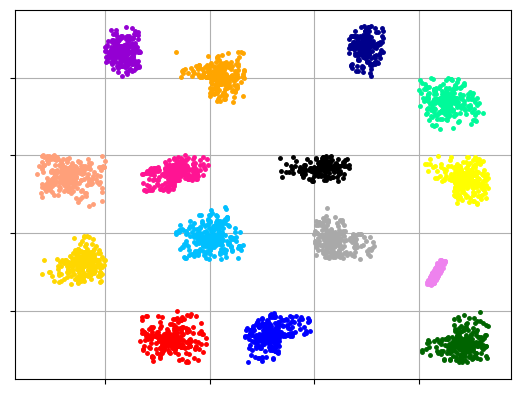

In [144]:
# Extract clusters
clusters = clique_instance.get_clusters()
# Visualize clusters
clique_visualizer.show_clusters(processed_data, clusters)

In [145]:
# Predicted labels (flattening cluster indices for each data point)
labels_pred = [0] * len(processed_data)  # Initialize labels as 0 (noise)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels_pred[index] = cluster_id + 1  # Cluster ID starts from 1

In [146]:
cluster_distribution = Counter(labels_pred)
print("Predicted Distribution: ",cluster_distribution)

Predicted Distribution:  Counter({0: 1031, 6: 313, 2: 296, 8: 292, 12: 285, 9: 285, 4: 277, 3: 275, 10: 272, 1: 265, 7: 251, 5: 246, 13: 246, 15: 243, 14: 235, 11: 188})


In [147]:
LABELS_FILE_NAME = 's1-label'
labels_true = load_labels_from_file(rf'..\data\label\{LABELS_FILE_NAME}.pa', len(labels_pred))
cluster_distribution = Counter(labels_true)
print(cluster_distribution)

Counter({13: 350, 14: 350, 15: 350, 12: 349, 11: 347, 10: 342, 9: 341, 8: 338, 7: 334, 6: 326, 5: 325, 4: 318, 2: 316, 3: 314, 1: 300})


In [148]:
clustering_algorithm_name = 'clique_clustering'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

In [149]:
# Convert processed_data to a numpy array for plotting
processed_data_np = np.array(processed_data)

# plot_clusters(processed_data, labels_pred, title='CLIQUE Clustering Visualization')

In [150]:
labels_pred = map_clusters_to_ground_truth(labels_true, labels_pred)

Confusion Matrix:


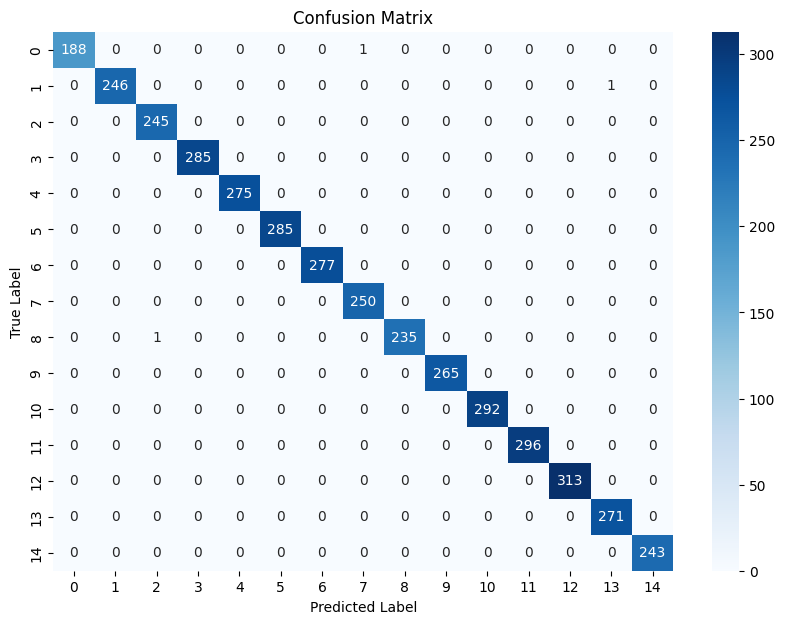


Overall Accuracy: 79.32%
This represents the proportion of all data points that were correctly grouped by the clustering algorithm.


In [151]:
generate_confusion_matrix(labels_true, labels_pred, N_CLASSES)

In [152]:
algorithm_params = f"intervals: {intervals}, threshold: {threshold}"
algorithm_details = str(algorithm_params)

In [153]:
# Evaluate and save results
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clus_algo_name=clustering_algorithm_name, dataset_name=dataset_name, 
                    results_path=results_path, algorithm_details=algorithm_details, 
                    running_time=running_time)

Timestamp: 2024-02-07 06:24:44.947684
Dataset: s1
Clustering Algorithm: clique_clustering
Algorithm Details: intervals: 15, threshold: 30
Running Time (seconds): 0.15893864631652832
Accuracy: 0.7932
